<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [5]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.558949,92.557833,37.960705,-2.790603,227.286884,230.384337,-3.097453
1,0.0,1.0,43.951752,60.195321,45.802838,-18.640092,141.309820,157.690516,-16.380697
2,0.0,2.0,84.456462,95.499786,63.258630,-0.814554,252.400324,253.727213,-1.326889
3,0.0,3.0,61.827094,55.458524,59.106220,-9.338640,177.053198,184.990743,-7.937545
4,0.0,4.0,69.978492,86.208501,41.040084,6.761309,213.988387,206.593276,7.395111
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.130095,41.989027,36.084447,1.517455,143.721024,143.338335,0.382689
59996,999.0,56.0,31.572026,83.337015,33.097776,-1.399152,156.607665,160.452736,-3.845071
59997,999.0,57.0,85.197533,22.092798,42.887027,1.860430,162.037789,160.682451,1.355337
59998,999.0,58.0,65.700415,36.097305,67.155638,1.071816,180.025175,178.444278,1.580896


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.558949,92.557833,37.960705,-2.790603,227.286884,230.384337,-3.097453
1,0.0,1.0,43.951752,60.195321,45.802838,-18.640092,141.309820,157.690516,-16.380697
2,0.0,2.0,84.456462,95.499786,63.258630,-0.814554,252.400324,253.727213,-1.326889
3,0.0,3.0,61.827094,55.458524,59.106220,-9.338640,177.053198,184.990743,-7.937545
4,0.0,4.0,69.978492,86.208501,41.040084,6.761309,213.988387,206.593276,7.395111
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.130095,41.989027,36.084447,1.517455,143.721024,143.338335,0.382689
59996,999.0,56.0,31.572026,83.337015,33.097776,-1.399152,156.607665,160.452736,-3.845071
59997,999.0,57.0,85.197533,22.092798,42.887027,1.860430,162.037789,160.682451,1.355337
59998,999.0,58.0,65.700415,36.097305,67.155638,1.071816,180.025175,178.444278,1.580896


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    89.558949  92.557833  37.960705  ...  227.286884  230.384337  -3.097453
      1.0    43.951752  60.195321  45.802838  ...  141.309820  157.690516 -16.380697
      2.0    84.456462  95.499786  63.258630  ...  252.400324  253.727213  -1.326889
      3.0    61.827094  55.458524  59.106220  ...  177.053198  184.990743  -7.937545
      4.0    69.978492  86.208501  41.040084  ...  213.988387  206.593276   7.395111
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   54.130095  41.989027  36.084447  ...  143.721024  143.338335   0.382689
      56.0   31.572026  83.337015  33.097776  ...  156.607665  160.452736  -3.845071
      57.0   85.197533  22.092798  42.887027  ...  162.037789  160.682451   1.355337
      58.0   65.700415  36.097305  67.155638  ...  180.025175  178.444278   1.580896
      59.0   33.210723  88.483361  92.819849  ...  225.285683  224.102714   1.182969

[60000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    89.558949  92.557833  37.960705  ...  227.286884  230.384337  -3.097453
      1.0    43.951752  60.195321  45.802838  ...  141.309820  157.690516 -16.380697
      2.0    84.456462  95.499786  63.258630  ...  252.400324  253.727213  -1.326889
      3.0    61.827094  55.458524  59.106220  ...  177.053198  184.990743  -7.937545
      4.0    69.978492  86.208501  41.040084  ...  213.988387  206.593276   7.395111
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   54.130095  41.989027  36.084447  ...  143.721024  143.338335   0.382689
      56.0   31.572026  83.337015  33.097776  ...  156.607665  160.452736  -3.845071
      57.0   85.197533  22.092798  42.887027  ...  162.037789  160.682451   1.355337
      58.0   65.700415  36.097305  67.155638  ...  180.025175  178.444278   1.580896
      59.0   33.210723  88.483361  92.819849  ...  225.285683  224.102714   1.182969

[60000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.558949,92.557833,37.960705,-2.790603,227.286884,230.384337,-3.097453
1,0.0,1.0,43.951752,60.195321,45.802838,-18.640092,141.309820,157.690516,-16.380697
2,0.0,2.0,84.456462,95.499786,63.258630,-0.814554,252.400324,253.727213,-1.326889
3,0.0,3.0,61.827094,55.458524,59.106220,-9.338640,177.053198,184.990743,-7.937545
4,0.0,4.0,69.978492,86.208501,41.040084,6.761309,213.988387,206.593276,7.395111
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,54.130095,41.989027,36.084447,1.517455,143.721024,143.338335,0.382689
59996,999.0,56.0,31.572026,83.337015,33.097776,-1.399152,156.607665,160.452736,-3.845071
59997,999.0,57.0,85.197533,22.092798,42.887027,1.860430,162.037789,160.682451,1.355337
59998,999.0,58.0,65.700415,36.097305,67.155638,1.071816,180.025175,178.444278,1.580896


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    89.558949  92.557833  37.960705  ...  227.286884  230.384337  -3.097453
      1.0    43.951752  60.195321  45.802838  ...  141.309820  157.690516 -16.380697
      2.0    84.456462  95.499786  63.258630  ...  252.400324  253.727213  -1.326889
      3.0    61.827094  55.458524  59.106220  ...  177.053198  184.990743  -7.937545
      4.0    69.978492  86.208501  41.040084  ...  213.988387  206.593276   7.395111
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   54.130095  41.989027  36.084447  ...  143.721024  143.338335   0.382689
      56.0   31.572026  83.337015  33.097776  ...  156.607665  160.452736  -3.845071
      57.0   85.197533  22.092798  42.887027  ...  162.037789  160.682451   1.355337
      58.0   65.700415  36.097305  67.155638  ...  180.025175  178.444278   1.580896
      59.0   33.210723  88.483361  92.819849  ...  225.285683  224.102714   1.182969

[60000 rows x 7 columns]

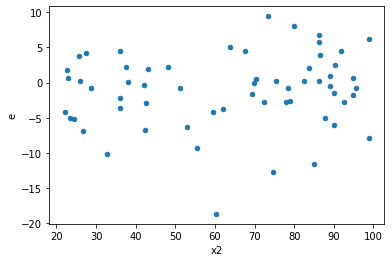

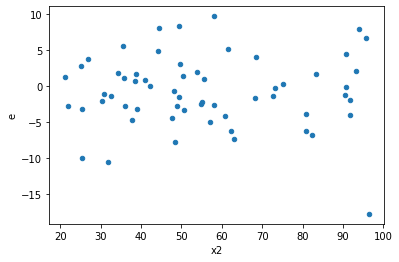

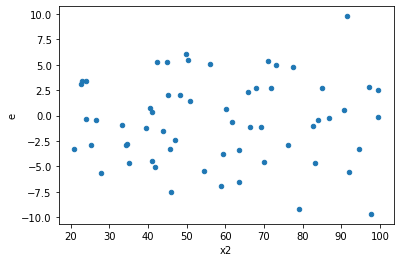

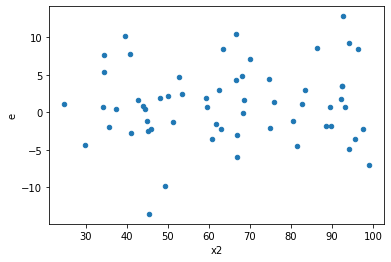

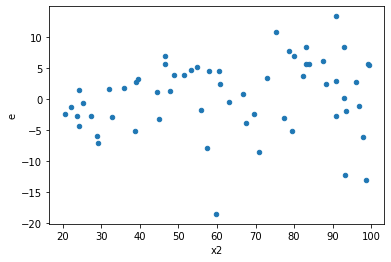

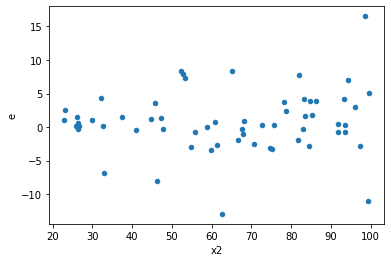

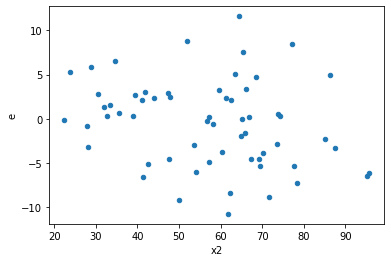

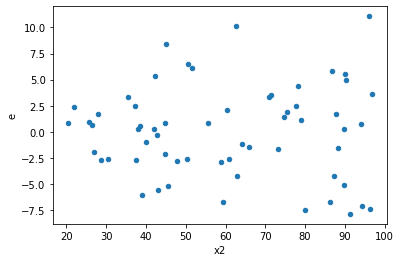

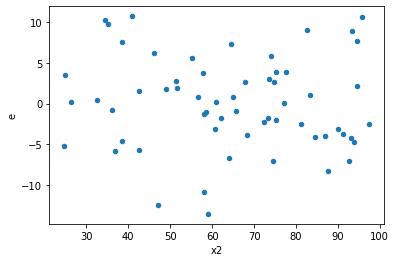

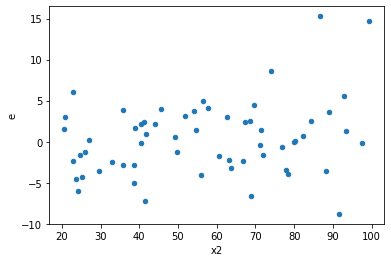

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,387.3936466502301,509.33625476308885,18.447316507153815,24.254107369670898,1.3147769953567625,0.5361264316468368,0.7319367841765816,0.2680632158234184,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,380.1300885800144,714.0074094032542,18.101432789524495,34.00035282872639,1.878323844530295,0.15681175224816535,0.9215941238759173,0.07840587612408267,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,203.87198591602657,433.40862216306084,9.708189805525075,20.63850581728861,2.12588610551711,0.09136392619808142,0.9543180369009593,0.04568196309904071,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,185.99552679490338,851.5796178413707,8.856929847376351,40.5514103733986,4.578495152630227,0.0009702798894988263,0.9995148600552506,0.00048513994474941313,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,322.7996691718384,419.60838059591083,15.37141281770659,19.981351456948136,1.2999033786882153,0.5531579187474411,0.7234210406262794,0.27657895937372057,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,377.3259237958208,529.9915852218003,17.967901133134326,25.237694534371443,1.4045989204510372,0.44281732604447965,0.7785913369777602,0.22140866302223983,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,249.9997751265096,495.29042554611266,11.904751196500458,23.5852583593387,1.9811634842290415,0.12515910621593052,0.9374204468920347,0.06257955310796526,Reject001=1 : Homoscedasticity
9.0,21.0,21.0,265.6275505364353,583.2227638241063,12.648930977925492,27.772512563052683,2.195641087102173,0.07861000461186318,0.9606949976940684,0.03930500230593159,Reject001=1 : Homoscedasticity
10.0,21.0,21.0,308.2530652789828,931.3745891449769,14.678717394237275,44.35117091166556,3.0214609165428454,0.01450152343310962,0.9927492382834452,0.00725076171655481,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,387.3936466502301,509.33625476308885,18.447316507153815,24.254107369670898,1.3147769953567625,0.5361264316468368,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,380.1300885800144,714.0074094032542,18.101432789524495,34.00035282872639,1.878323844530295,0.15681175224816535,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,203.87198591602657,433.40862216306084,9.708189805525075,20.63850581728861,2.12588610551711,0.09136392619808142,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,609.940379017806,554.913442358144,29.044779953228858,26.424449636102096,0.909783089376256,0.8305182136659203,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,185.99552679490338,851.5796178413707,8.856929847376351,40.5514103733986,4.578495152630227,0.0009702798894988263,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,322.7996691718384,419.60838059591083,15.37141281770659,19.981351456948136,1.2999033786882153,0.5531579187474411,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,377.3259237958208,529.9915852218003,17.967901133134326,25.237694534371443,1.4045989204510372,0.44281732604447965,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,249.9997751265096,495.29042554611266,11.904751196500458,23.5852583593387,1.9811634842290415,0.12515910621593052,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,771.9709012123532,649.3020529587822,36.76051910535015,30.919145378989626,0.8410965386636674,0.6953736792861491,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      863
Reject001=0 : Heteroscedasticity    137
Name: Result_test, dtype: int64